# **The Problem**
---

A large bank has asked us to evaluate the marketing algorithms they use for retail banking. Their sophisticated phone marketing algorithm predicts whether a certain person will subscribe to a term deposit or not. Based on that assessment, the bank then optimises its phone calling strategy. With this algorithm, the bank has been successful in predicting which clients are more likely to subscribe to their term deposits. 

## Bank Marketing Dataset
---

**Abstract:** The data `bank-additional-full.csv` is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

**Data Set Information:** The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

# Attribute Information:
**Bank client data:**
Age (numeric)
Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

**Related with the last contact of the current campaign:**
Contact: contact communication type (categorical:
'cellular','telephone')
Month: last contact month of year (categorical: 'jan', 'feb', 'mar',
…, 'nov', 'dec')
Day_of_week: last contact day of the week (categorical:
'mon','tue','wed','thu','fri')
Duration: last contact duration, in seconds (numeric). Important
note: this attribute highly affects the output target (e.g., if
duration=0 then y='no'). Yet, the duration is not known before a call
is performed. Also, after the end of the call y is obviously known.
Thus, this input should only be included for benchmark purposes and
should be discarded if the intention is to have a realistic
predictive model.

**Other attributes:**
Campaign: number of contacts performed during this campaign and for
this client (numeric, includes last contact)
Pdays: number of days that passed by after the client was last
contacted from a previous campaign (numeric; 999 means client was not
previously contacted)
Previous: number of contacts performed before this campaign and for
this client (numeric)
Poutcome: outcome of the previous marketing campaign (categorical:
'failure','nonexistent','success')

**Social and economic context attributes**
Emp.var.rate: employment variation rate - quarterly indicator
(numeric)
Cons.price.idx: consumer price index - monthly indicator (numeric)
Cons.conf.idx: consumer confidence index - monthly indicator
(numeric)
Euribor3m: euribor 3 month rate - daily indicator (numeric)
Nr.employed: number of employees - quarterly indicator (numeric)

**Output variable (desired target):**
y - has the client subscribed a term deposit? (binary: 'yes', 'no')

In [37]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

# For Modeling packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [38]:
# Import the dataset which contains the banks phone call information
bank_data = pd.read_csv("/kaggle/input/bank-marketing/bank-additional-full.csv", sep= ';')
bank_data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [39]:
'''
Check the data for any missing observations.
Observe the data types, columns (attributes), and other details
'''
print(bank_data.isna().sum())
print(bank_data.info())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   mon

# Model Classification

**Logistic Regression** is a straightforward choice for its interpretability and ability to model linear relationships, making it suitable for understanding feature impacts in banking datasets. **K-Nearest Neighbors (KNN)** is useful when the decision boundary is complex or not well defined, as it captures local patterns effectively. **Decision Trees** are interpretable and capture non-linear relationships and interactions between features, making them suitable when feature importance and interaction effects are key. Choosing the best model depends on the specific characteristics of the banking dataset and the importance of interpretability versus complexity in modeling the target binary outcome.

## Logistic Regression Model

Logistic Regression Model:
Accuracy: 0.9017965525613013
              precision    recall  f1-score   support

          no       0.91      0.99      0.95      7298
         yes       0.71      0.24      0.36       940

    accuracy                           0.90      8238
   macro avg       0.81      0.61      0.65      8238
weighted avg       0.89      0.90      0.88      8238



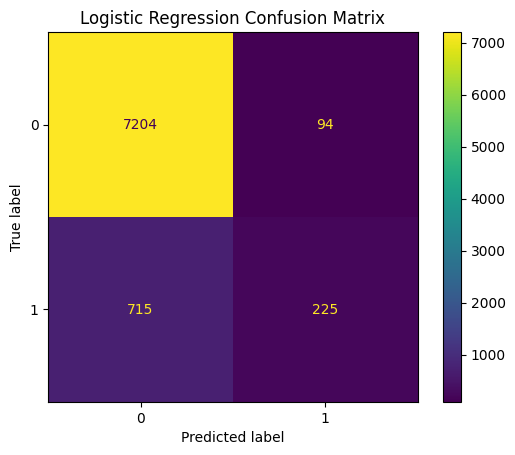

In [40]:
# Separate feature and target variables
feature = bank_data.drop(columns=['y', 'duration'], axis=1)
target = bank_data['y']

# Split the data set into training and testing 
fe_train, fe_test, ta_train, ta_test = train_test_split(feature, target, 
                                                        test_size= 0.2, random_state= 123)

# Preprocessing: Identify numeric and categorical features
numeric_features = feature.select_dtypes(include=['int64', 'float64']).columns
categorical_features = feature.select_dtypes(include=['object']).columns

# Make preprocessors for numeric and categorical values
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy= 'mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown= 'ignore'))
])
    
# Apply numeric and categorical prepocessing step to columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Append LogisticRegression to preprocessing pipeline
lg_model = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', LogisticRegression(max_iter= 1000))])

logreg_model = lg_model.named_steps['classifier']

# Fit the model
lg_model.fit(fe_train, ta_train)
    
# Predict the target values using test set
lg_pred = lg_model.predict(fe_test)

# Evaluate the Logistic Regression Model
print("Logistic Regression Model:")
print("Accuracy:", accuracy_score(ta_test, lg_pred))
print(classification_report(ta_test, lg_pred))

# Plot the Confusion Matrix
lg_conf_m = confusion_matrix(ta_test, lg_pred)
ConfusionMatrixDisplay(confusion_matrix= lg_conf_m).plot(cmap= 'viridis')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

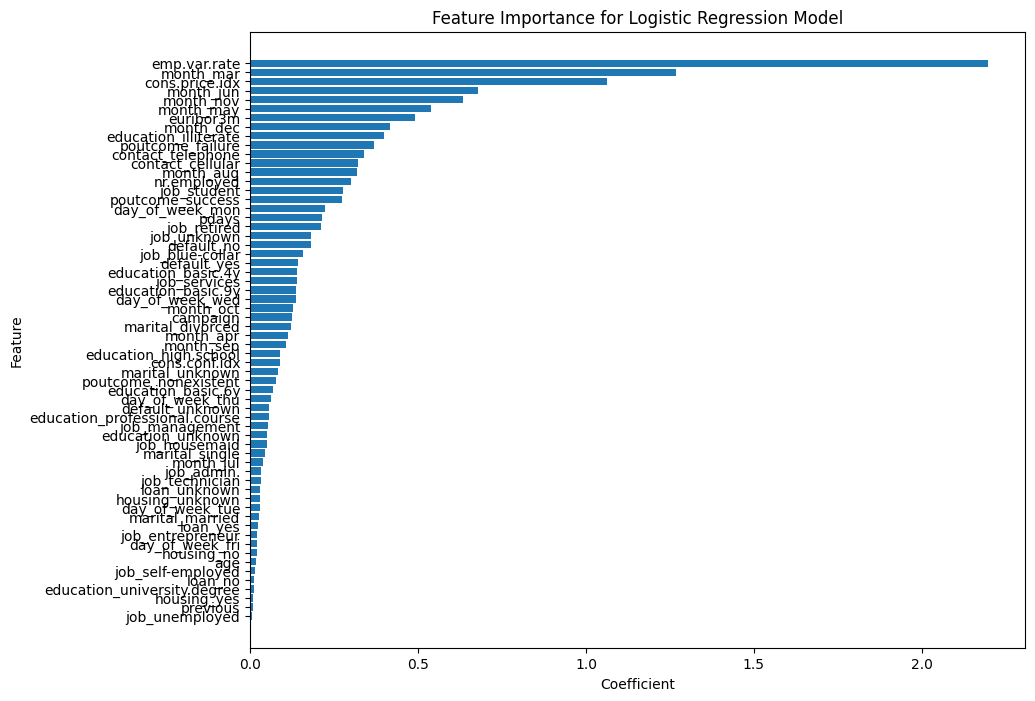

In [46]:
# Most important features for model
feature_importance = np.abs(logreg_model.coef_[0])

# Get the feature names
onehot_features = lg_model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
complete_features = list(numeric_features) + list(onehot_features)

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'features': complete_features,
    'importance': feature_importance
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by= 'importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['features'], feature_importance_df['importance'])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance for Logistic Regression Model')
plt.gca().invert_yaxis()
plt.show()

## According to the Logistic Regression model, if a client has a history of has high `employment variation rate`, this majorly affects the success of subscribing to a term-loan deposit. 

# K-Nearest Neighbour Classifier


K-Nearest Neighbors Model:
Accuracy: 0.891964068948774
              precision    recall  f1-score   support

          no       0.92      0.97      0.94      7298
         yes       0.54      0.32      0.41       940

    accuracy                           0.89      8238
   macro avg       0.73      0.64      0.67      8238
weighted avg       0.87      0.89      0.88      8238



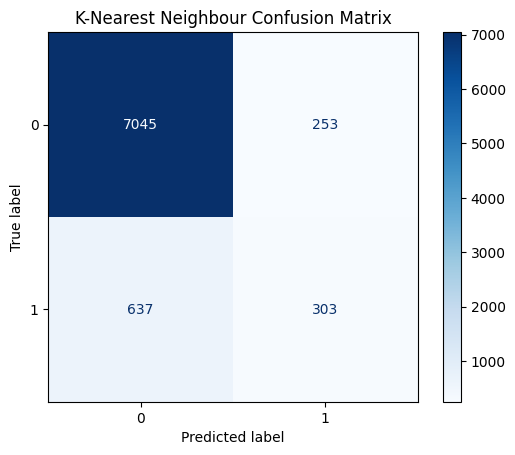

In [42]:
# Instantiate KNN model in preprocessing pipeline
knn = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', KNeighborsClassifier(n_neighbors= 5))])

knn_model = knn.named_steps['classifier']

# Fit the model
knn.fit(fe_train,ta_train)

# Make predictions for target value
knn_pred = knn.predict(fe_test)

# Model evaluation
print("\nK-Nearest Neighbors Model:")
print("Accuracy:", accuracy_score(ta_test, knn_pred))
print(classification_report(ta_test, knn_pred))

# Plot the Confusion Matrix
knn_conf_m = confusion_matrix(ta_test, knn_pred)
ConfusionMatrixDisplay(confusion_matrix= knn_conf_m).plot(cmap= 'Blues')
plt.title('K-Nearest Neighbour Confusion Matrix')
plt.show()

Accoring to the confusion matrix, the KNN Model also predicted majority of the True Negatives, which indicates that the model works best for predicting whether the client/customer will **NOT** subscribe to a term-deposit. This can be corroborated by the classification report of the No value with an f1 score of **94%**.

In [43]:
# Print key attributes of the KNN model
print(f'Number of neighbors: {knn_model.n_neighbors}')
print(f'Distance metric: {knn_model.metric}')
print(f'Training samples shape: {knn_model._fit_X.shape}')

Number of neighbors: 5
Distance metric: minkowski
Training samples shape: (32950, 62)


## Decision Tree Model


Decision Tree Model:
Accuracy: 0.8378247147365866
              precision    recall  f1-score   support

          no       0.92      0.90      0.91      7298
         yes       0.32      0.36      0.34       940

    accuracy                           0.84      8238
   macro avg       0.62      0.63      0.62      8238
weighted avg       0.85      0.84      0.84      8238



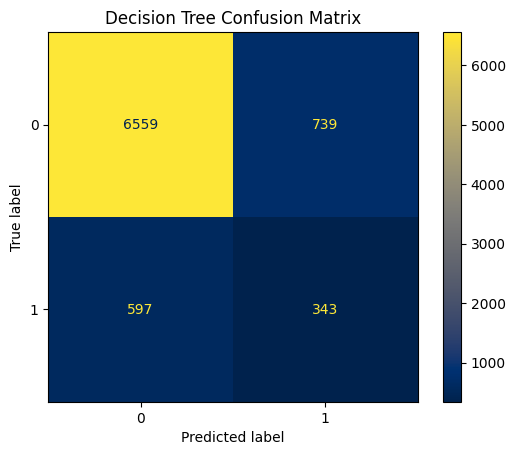

In [44]:
# Instantiate Decision Tree in preprocessing pipeline
dt = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', DecisionTreeClassifier(random_state= 123))])

# Fit the model
dt.fit(fe_train, ta_train)

# Make predictions using test set
dt_pred = dt.predict(fe_test)

# Model evaluation
print("\nDecision Tree Model:")
print("Accuracy:", accuracy_score(ta_test, dt_pred))
print(classification_report(ta_test, dt_pred))

dt_conf_m = confusion_matrix(ta_test, dt_pred)
ConfusionMatrixDisplay(confusion_matrix= dt_conf_m).plot(cmap= 'cividis')
plt.title('Decision Tree Confusion Matrix')
plt.show()

Accoring to the confusion matrix, the Decision Tree Model predicted majority of the True Negatives, which indicates that the model works best for predicting whether the client/customer will **NOT** subscribe to a term-deposit. This can be corroborated by the classification report of the No value with an f1 score of **91%**. However, out of the three models, it has the lowest recall rate (NO) of **90%**. But, the DT model also had the highest recall rate (YES) of **36%**